<img src=images/Stöwer_Titanic.jpg align="right" width="15%" style="margin-right:10%"></div>

#### June 1, 2016 - Women in Data Science ATX Meetup - "Data Science from Scratch" Workshop #3

# Cleaning and Munging the Titanic Data Set with Pandas

- This notebook was taken from https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/notebook and modified for this workshop.
- The files `train.csv` and `test.csv` were downloaded from https://www.kaggle.com/c/titanic/data.

### First Things First
1. If you have `git` installed on your machine and are comfortable with the command line, navigate to the directory where you'd like to keep the files from this workshop and clone the repository:
> `git clone https://github.com/womenindatascienceatx/titanic-data-munging.git`

    If you don't have `git` installed you can download the repository this way:
        - Go to the repo https://github.com/womenindatascienceatx/titanic-data-munging
        - Click the "Clone or download" button
        - Click "Download ZIP"
2. Install the following packages (e.g., `conda install <package_name>`) if you don't already have them:
    - `pandas`
    - `numpy`
    - `matplotlib`
    - `seaborn`
3. If you have any issues don't hesitate to ask your group mates, the organizers, or your neighbors so we can all help each other get set up!

*Note: You can use the `watermark` extension by Sebastian Raschka to help with reproducibility https://github.com/rasbt/watermark*

### Import Libraries

In [72]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Print version info
import sys
import matplotlib as mpl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)

python 3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]

pandas 0.17.1
numpy 1.10.1
matplotlib 1.5.1
seaborn 0.7.0


### Load the Titanic Data Set

#### VARIABLE DESCRIPTIONS:
- **Survived**:        Survival (0 = No; 1 = Yes)
- **Pclass**:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **Name**:            Name
- **Sex**:             Sex
- **Age**:             Age
- **SibSp**:           Number of Siblings/Spouses Aboard
- **Parch**:           Number of Parents/Children Aboard
- **Ticket**:          Ticket Number
- **Fare**:            Passenger Fare
- **Cabin**:           Cabin
- **Embarked**:        Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

#### SPECIAL NOTES:
- **Pclass** is a proxy for socio-economic status (SES)
    - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- **Age** is in Years; Fractional if Age less than One (1)
    - If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. **SibSp** and **ParCh**) some relations were ignored.  The following are the definitions used for sibsp and parch.
    - *Sibling*:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    - *Spouse*:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    - *Parent*:   Mother or Father of Passenger Aboard Titanic
    - *Child*:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    - Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [12]:
# Get train & test csv files as a DataFrame
titanic_df = pd.read_csv("data/train.csv", 
                         dtype={'Age': np.float64,     # can specify data types when reading the csv file
                                'SibSp': np.int64,
                                #...
                               },  
                         #parse_dates=['Date'],        # if we had a column named "Date" we could use this to
                         #infer_datetime_format=True   #   have pandas try to parse the datetime strings
                        )  
test_df  = pd.read_csv("data/test.csv")

# Preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


## <font color='blue'> When you see text in blue font:</font>
- <font color='blue'> Discuss the question or do the exercise with your group</font>
- <font color='blue'> Post your answers, graphs, etc. to the Slack channel for tonight's workshop: #2016-06-01-workshop</font>

### <font color='blue'> Q1: Are the variable data types (int, object, float) what we expect?</font>
### <font color='blue'> Q2: Which data columns have missing values?</font>
### <font color='blue'> Q3: Why are there 2 csv files (which we've read into DataFrame objects as "titanic_df" and "test_df")?</font>

## Prepare Data for Predictive Modeling
Our end goal after "munging" the data is to predict whether or not a passenger on the Titanic survived after shipwreck.  
Let's go through the Titanic data set, column by column, and apply data munging tasks as needed to prepare our data for predictive modeling.

### <font color='blue'> Q4: We did [exploratory data analysis (EDA) of the Titanic data set](https://github.com/womenindatascienceatx/titanic-EDA/blob/master/Titanic%204-21-2016%20-%20Answers.ipynb) during our last workshop. Based on the intuition we gained  from EDA, which munging tasks do you think we'll need to apply to which columns?  Here's a list of some possible tasks:
- Renaming variables
- Data type conversion
- Encoding, decoding or recoding data
- Merging datasets
- Transforming data
- Missing value imputation
- Handling outliers
- Finding and fixing typos
</font>

### <font color='blue'> Q5: Which columns, if any, may not be helpful for predicting who survived?  Why?</font>

In [19]:
test_df.columns

Index(['Pid', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
test_df.rename(columns = {'PassengerId':'Pid'}, inplace=True)

### `PassengerId`, `Name` and `Ticket`

In [20]:
# Drop unnecessary columns; these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df  = test_df.drop(['Name','Ticket'], axis=1)

### `Survived`
We are trying to predict this variable.  The `Survived` column is present in the training data (`titanic_df`) but not in the test data (`test_df`).

Next, let's deal with the columns that have missing values: `Age`, `Cabin`, `Embarked`, `Fare`

### `Age`

### <font color='blue'> Q6: What are some ways that we can deal with the missing Age values?</font>

Conceptual overview of (arithmetic) mean (i.e., average) and median:
- *mean*: average of all numbers
- *median*: middle number in list of all numbers
- *mode*: most frequent number

<img src=images/Skewed-with-median-mean-and-mode.jpg align="left" width="35%" style="margin-right:5%"></div>
<img src=images/Normalk-Distribution.gif align="right" width="25%" style="margin-right:15%"></div>

Conceptual overview of standard deviation $\sigma$:
- *std*: measure of how spread out numbers are

<img src=images/Standard_deviation_diagram.svg align="left" width="45%" style="margin-right:5%"></div>
<img src=images/standard-deviation-examples1.png align="right" width="42%" style="margin-right:5%"></div>


In [21]:
# Get average, standard deviation, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# Get average, standard deviation, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# Keep the ages around for plotting later
titanic_ages_old = titanic_df['Age']
test_ages_old    = test_df['Age']

In [27]:
len(titanic_ages_old), count_nan_age_titanic, average_age_titanic

(891, 177, 29.69911764705882)

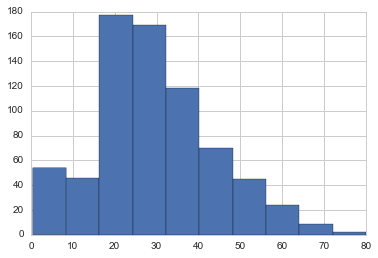

In [22]:
titanic_ages_old.hist()

In [26]:
# Generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, 
                           average_age_titanic + std_age_titanic, 
                           size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, 
                           average_age_test + std_age_test, 
                           size = count_nan_age_test)

# Fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
# Convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

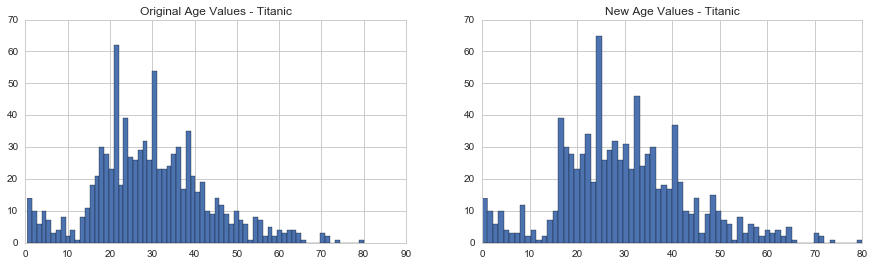

In [29]:
# Histogram of original/new titanic_df ages
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

# Plot original Age values
titanic_ages_old.hist(bins=70, ax=axis1)
        
# Plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)

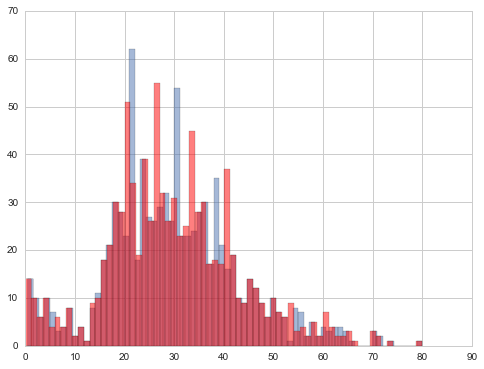

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
titanic_ages_old.hist(bins=70,alpha=0.5)
titanic_df['Age'].hist(bins=68,alpha=0.5,color='r')

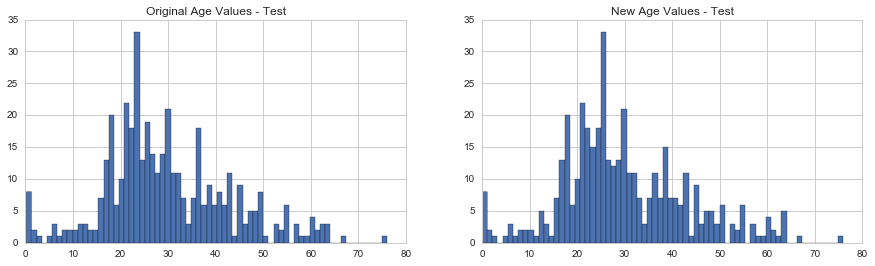

In [40]:
# Histogram of original/new train_df ages
fig, (axis3, axis4) = plt.subplots(1, 2, figsize=(15,4))
axis3.set_title('Original Age Values - Test')
axis4.set_title('New Age Values - Test')

# Plot original Age values
test_ages_old.hist(bins=70, ax=axis3)
     
# Plot new Age Values
test_df['Age'].hist(bins=70, ax=axis4)

### <font color='blue'> Compare the mean and std of the old and new Age distributions - they shouldn't have changed much.</font>

### `Cabin`

### <font color='blue'> Q7: What do you want to do about the missing values of Cabin?  </font>

Around 77-78% of the Cabin values are missing!!

In [41]:
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

In [48]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q
0,0,3,male,22,1,0,7.2500,S,0,0
1,1,1,female,38,1,0,71.2833,C,1,0
2,1,3,female,26,0,0,7.9250,S,0,0
3,1,1,female,35,1,0,53.1000,S,0,0
4,0,3,male,35,0,0,8.0500,S,0,0


### `Embarked`

In [43]:
# Only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

We filled the two missing values.  Now let's take a look at the relationship between `Embarked` (port of embarkation) and `Survived` (whether a passenger survived).

*Seaborn API reference: https://stanford.edu/~mwaskom/software/seaborn/api.html*

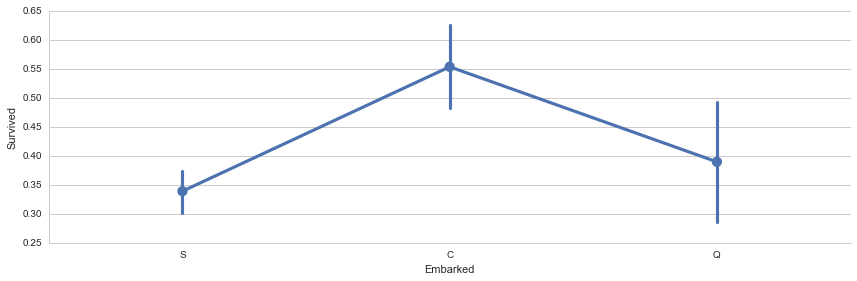

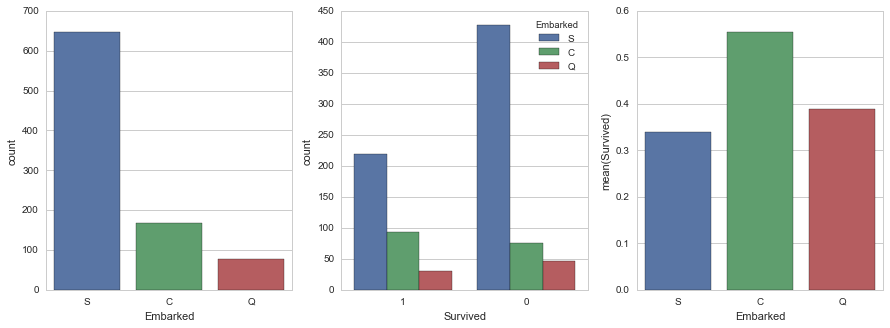

In [46]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# Group by Embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

### <font color='blue'> Q8: Do you think that Embarked will be useful in predicting Survival? Why? </font>

#### Dummy Variables:
- pd.get_dummies converts a categorical variable into dummy/indicator variables
- <a href="https://en.wikipedia.org/wiki/Dummy_variable_(statistics)">https://en.wikipedia.org/wiki/Dummy\_variable\_(statistics)</a>

In [45]:
# EITHER, consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

In [47]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q
0,0,3,male,22,1,0,7.2500,S,0,0
1,1,1,female,38,1,0,71.2833,C,1,0
2,1,3,female,26,0,0,7.9250,S,0,0
3,1,1,female,35,1,0,53.1000,S,0,0
4,0,3,male,35,0,0,8.0500,S,0,0


In [68]:
random.gauss(0,0.5)

-0.39839226807850225

In [77]:
newsurv = [x+random.gauss(0,0.1) for x in titanic_df['Survived']]
newC = [x+random.gauss(0,0.1) for x in titanic_df['C']]
results = scipy.stats.linregress(newC,newsurv)
xx = np.linspace(-2,2,100)

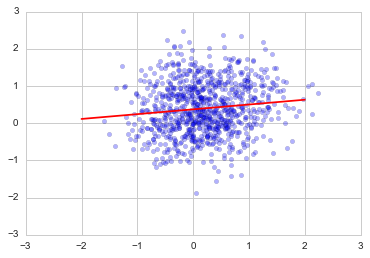

In [79]:
plt.scatter(newC,newsurv,alpha=0.3)
plt.plot(xx,results.slope*xx+results.intercept,color='r')

In [53]:
# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

### <font color='blue'> Q9: Which option would you have chosen?</font>

### `Fare`

In [ ]:
# Only for test_df, since there is a missing "Fare" value.  Fill with median value.
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

Again, we filled the missing value with the median value.  

Next, let's ignore "cents" in the Fare:

In [ ]:
# Convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

In [ ]:
titanic_df.head()

In [ ]:
# Get fares for passengers who survived/didn't survive
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# Get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# Plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

### <font color='blue'> Continue working through the remaining columns (Pclass, Sex, SibSp, Parch) in your groups and comment in the Slack channel for discussion. </font>

### `Pclass`


In [ ]:
sns.factorplot(x='Pclass', y='Survived', kind='point', order=[1,2,3], data=titanic_df, size=5)

In [ ]:
# Create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [ ]:
titanic_df.head()

### `Sex`

In [ ]:
# Create a function to define those who are children (less than 16)
def get_person(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [ ]:
# Apply the `get_person` function and add the results as a new column called `Person`
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person, axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

In [ ]:
# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

In [ ]:
# As we see, children (age < 16) on board seem to have a high chance for survival.
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,5))

# sns.factorplot('Person', data=titanic_df, kind='count', ax=axis1) 
sns.countplot(x='Person', data=titanic_df, ax=axis1)                # same as factorplot(..., kind='count', ...)

# Average of survived for each Person(male, female, or child)
family_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=family_perc, ax=axis2, order=['male','female','child'])

In [ ]:
# Create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Male', 'Female', 'Child']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Male', 'Female', 'Child']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

In [ ]:
# We don't need Person column any more
titanic_df.drop(['Person'], axis=1, inplace=True)
test_df.drop(['Person'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.tail()

### `SibSp` and `Parch`

In [ ]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# Drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

In [ ]:
titanic_df.head()

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# Average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [ ]:
titanic_df.head()

### <font color='blue'> Final Question: Is there anything you might have done differently when filling in missing values, dropping columns, etc.?</font>

## Define Training and Testing Sets

In [ ]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

At this point we are ready to use our "munged" training data to build models for predicting passenger survival in the test data, which we will try in later workshops!  Thanks for coming!!